In [ ]:
# Reads in 
#  1. a set of planet parameters
#  2. template XML file 
# and saves a new one with updated parameters 

# The resultingile gets sent to NASA cloud, and saves the results locally, with command like
# > curl --data-urlencode file@psg_cfg.txt https://psg.gsfc.nasa.gov/api.php > junk.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
file_name_psg_template = "/Users/eckhartspalding/Documents/git.repos/life_detectors/notebooks/psg_cfg_template.txt"
file_name_planet_population = "/Users/eckhartspalding/Documents/git.repos/life_detectors/felix_yields/input/trunc_20260206_sweep_diam_3_0_catalog.txt"
#file_name_planet_population = "/Users/eckhartspalding/Documents/git.repos/life_detectors/felix_yields/input/20260206_sweep_diam_3_0_catalog.txt"

In [4]:
# read in the template file
# returns a DataFrame with ordered tag/value rows
def read_psg_template(path):
    rows = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line or ">" not in line:
                continue
            tag, value = line.split(">", 1)
            tag = tag + ">"
            rows.append({"tag": tag, "value": value})
    return pd.DataFrame(rows)

# write out updated template file
def write_psg_template(path, df):
    with open(path, "w") as f:
        for _, row in df.iterrows():
            f.write(f"{row['tag']}{row['value']}\n")

In [5]:
# read in the planet population file

df_planet_population = pd.read_csv(file_name_planet_population, skiprows=1, delim_whitespace=True)

/var/folders/wb/zn41c4yx58z1ktmcwgv62zyr0000gn/T/ipykernel_14294/2083551763.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_planet_population = pd.read_csv(file_name_planet_population, skiprows=1, delim_whitespace=True)


In [6]:
df_planet_population['id_orig__'].unique()

array([ 811480,  781923, 1034560,  340148, 1069099,  727130,  657133,
        543722,  186743,  805525,  191586,  812167,  273701,  300737,
        141457,  336506,  659646,  484061,   50666,  482105])

In [7]:
dupes = df_planet_population['id_orig__'].value_counts()
print(dupes[dupes > 1])

dup_ids = dupes[dupes > 1].index
df_planet_population[df_planet_population['id_orig__'].isin(dup_ids)]


Series([], Name: count, dtype: int64)


,Rp,Porb,Mp,ep,ip,Omegap,omegap,thetap,Abond,AgeomVIS,...,s_out,l_sun,hz_in,hz_out,hz_center,habitable,snr_1h,baseline,maxsep_snr_1h,id_orig__


In [8]:
df_planet_population[df_planet_population['id_orig__']==324159]
df_planet_population[df_planet_population['id_orig__']==324159]['name_s']

Series([], Name: name_s, dtype: object)

In [14]:
df_planet_population.keys()

Index(['Rp', 'Porb', 'Mp', 'ep', 'ip', 'Omegap', 'omegap', 'thetap', 'Abond',
       'AgeomVIS', 'AgeomMIR', 'z', 'ap', 'rp', 'AngSep', 'maxAngSep', 'Fp',
       'fp', 'Tp', 'Rs', 'Ms', 'Ts', 'Ds', 'RA', 'DEC', 'Nuniverse', 'Nstar',
       'Stype', 'id', 'name_s', 'eclip_lon', 'eclip_lat', 's_in', 's_out',
       'l_sun', 'hz_in', 'hz_out', 'hz_center', 'habitable', 'snr_1h',
       'baseline', 'maxsep_snr_1h', 'id_orig__'],
      dtype='object')

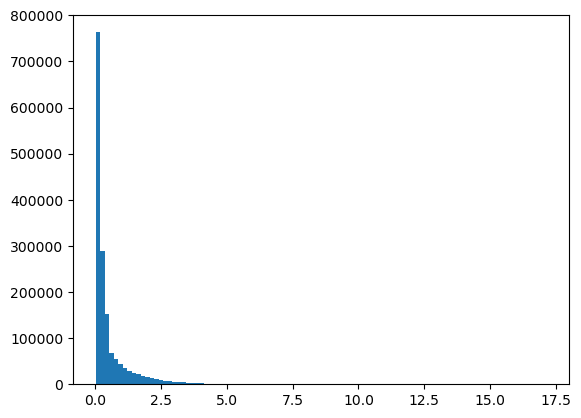

In [15]:
plt.hist(df_planet_population['ap'], bins=100)
plt.show()

In [9]:
data_template = read_psg_template(file_name_psg_template)

for i in range(1): # len(df_planet_population)):

    data_template_this = data_template.copy(deep=True)

    updates = {
        "<OBJECT-NAME>": "Planet",
        "<OBJECT-DIAMETER>": str(int(6371) * 2 * df_planet_population['Rp'].values[i]),  # (km); df_planet_population['Rp'] is (R_Earth = 6371 km)
        "<OBJECT-GRAVITY>": str(int(5.972e+24) * df_planet_population['Mp'].values[i]), # mass of planet (if units are set to kg below) (kg); (M_Earth = 5.972e+24 kg)
        "<OBJECT-GRAVITY-UNIT>": "kg",
        "<OBJECT-STAR-DISTANCE>": str(df_planet_population['ap'].values[i]), # semimajor axis (AU)
        "<OBJECT-STAR-TYPE>": str(df_planet_population['Stype'].values[i]),
        "<OBJECT-STAR-TEMPERATURE>": str(df_planet_population['Ts'].values[i]),
        "<OBJECT-STAR-RADIUS>": str(df_planet_population['Rs'].values[i]),
        "<OBJECT-INCLINATION>": str(df_planet_population['ip'].values[i]),
        "<GEOMETRY>": "MAVEN",
        "<OBJECT-PERIOD>": str(df_planet_population['Porb'].values[i]),  ## ## TODO: JUST ROTATIONAL PERIOD, OR ORBIT?
        "<OBJECT-SOLAR-LONGITUDE>": "107.1",  ## ## TODO: WHAT IS THIS?
        "<OBJECT-SOLAR-LATITUDE>": "25.10",  ## ## TODO: WHAT IS THIS?
        "<OBJECT-OBS-LONGITUDE>": "144.93",  ## ## TODO: WHAT IS THIS?
        "<OBJECT-OBS-LATITUDE>": "16.36",  ## ## TODO: WHAT IS THIS?
        "<OBJECT-POSITION-ANGLE>": "38.32"  ## ## TODO: WHAT IS THIS?
    }

    '''
    How to implement L2? Modify below later on #todo
    <GEOMETRY>Observatory
    <GEOMETRY-OFFSET-NS>0.0
    <GEOMETRY-OFFSET-EW>0.0
    <GEOMETRY-OFFSET-UNIT>diameter
    <GEOMETRY-OBS-ALTITUDE>1.4534
    <GEOMETRY-ALTITUDE-UNIT>AU
    <GEOMETRY-USER-PARAM>0.0
    <GEOMETRY-STELLAR-TYPE>G
    <GEOMETRY-STELLAR-TEMPERATURE>5777
    <GEOMETRY-STELLAR-MAGNITUDE>0
    <GEOMETRY-SOLAR-ANGLE>36.453
    <GEOMETRY-OBS-ANGLE>3.413
    <GEOMETRY-PLANET-FRACTION>6.045e-03
    <GEOMETRY-STAR-DISTANCE>-1.000000e+00
    <GEOMETRY-STAR-FRACTION>0.000000e+00
    <GEOMETRY-REF>User
    <GEOMETRY-DISK-ANGLES>1
    <GEOMETRY-ROTATION>-0.00,0.01
    <GEOMETRY-BRDFSCALER>1.000
    <GEOMETRY-AZIMUTH>0.000
    '''

    '''
    Appropriate atmospheric values?
    <ATMOSPHERE-DESCRIPTION>Mars Climate Database, Millour et al. 2015
    <ATMOSPHERE-STRUCTURE>Equilibrium
    <ATMOSPHERE-WEIGHT>43.63
    <ATMOSPHERE-PUNIT>mbar
    <ATMOSPHERE-NGAS>3
    <ATMOSPHERE-GAS>CO2,H2O,H2O
    <ATMOSPHERE-TYPE>HIT[2],HIT[1:1],HIT[1:4]
    <ATMOSPHERE-ABUN>1,1,7
    <ATMOSPHERE-UNIT>scl,scl,scl
    <ATMOSPHERE-LAYERS-MOLECULES>Altitude,CO2,N2,O2,CO,H2O,O3,Dust,WaterIce,Dust_size,WaterIce_size
    <ATMOSPHERE-PRESSURE>4.9755
    <ATMOSPHERE-LAYERS>49
    '''

    for key, value in updates.items():
        mask = data_template_this["tag"] == key
        if mask.any():
            data_template_this.loc[mask, "value"] = value
        else:
            print(f"Missing key in template: {key}")

    write_psg_template(f"output_psg_cfg_{i:08d}_.txt", data_template_this)

In [8]:
df_planet_population['Rp'].values[0]

np.float64(1.40423)

In [15]:
data_template

OrderedDict([('<OBJECT', 'Planet'),
             ('<OBJECT-NAME', 'Mars'),
             ('<OBJECT-DATE', '2016/01/24 01:00'),
             ('<OBJECT-DIAMETER', '6779'),
             ('<OBJECT-GRAVITY', '3.711'),
             ('<OBJECT-GRAVITY-UNIT', 'g'),
             ('<OBJECT-STAR-DISTANCE', '1.64596'),
             ('<OBJECT-STAR-VELOCITY', '-1.06846'),
             ('<OBJECT-SOLAR-LONGITUDE', '107.1'),
             ('<OBJECT-SOLAR-LATITUDE', '25.10'),
             ('<OBJECT-SEASON', '99.3'),
             ('<OBJECT-STAR-TYPE', 'G'),
             ('<OBJECT-STAR-TEMPERATURE', '5777'),
             ('<OBJECT-STAR-RADIUS', '1.0'),
             ('<OBJECT-OBS-LONGITUDE', '144.93'),
             ('<OBJECT-OBS-LATITUDE', '16.36'),
             ('<OBJECT-OBS-VELOCITY', '-17.637'),
             ('<OBJECT-PERIOD', '1.02733456'),
             ('<OBJECT-ORBIT',
              '0.09339400,49.55954,686.98000000,286.49683,1.38140,2458377.898109'),
             ('<OBJECT-POSITION-ANGLE', '38.32'),
  